<h1 align='center'> Índices de Calidad Ambiental en Ciudades Internacionales💥 <h1>


# Introducción

En el panorama global, la calidad ambiental en las ciudades desempeña un papel crucial en la vida cotidiana y el bienestar de sus habitantes. Este estudio se centra en un conjunto diverso de ciudades internacionales, explorando sus niveles de calidad del aire y calidad del agua. Ciudades emblemáticas, desde Nueva York hasta Berlín y San Francisco, nos brindan un insight fascinante sobre la variabilidad ambiental en diferentes regiones del mundo. A través de la evaluación de índices de calidad del aire y del agua, este análisis proporciona una visión integral de cómo estas metrópolis gestionan y enfrentan los desafíos ambientales, contribuyendo así a nuestra comprensión global de la sostenibilidad urbana.

# Librerias y Carga de Datos 📁

In [7]:
!pip install --quiet geocoder
print('pip installed geocoder')

import matplotlib.pyplot as plt


pip installed geocoder


In [4]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from warnings import filterwarnings
filterwarnings(action='ignore', category=FutureWarning)

# Cargar el archivo CSV
df = pd.read_csv('Cities1.csv')

print(df.head())


               City                Region                   Country  \
0     New York City              New York  United States of America   
1  Washington, D.C.  District of Columbia  United States of America   
2     San Francisco            California  United States of America   
3            Berlin                   NaN                   Germany   
4       Los Angeles            California  United States of America   

   AirQuality  WaterPollution  
0   46.816038       49.504950  
1   66.129032       49.107143  
2   60.514019       43.000000  
3   62.364130       28.612717  
4   36.621622       61.299435  


**Obtención de las coordenadas geográficas de ciudades** 

In [32]:
from arrow import now
from geocoder import arcgis
from os.path import exists

OUTPUT_FOLDER = './'
OUTPUT_FILE = 'locations.csv'

# this takes a little over a half hour 
# so we don't want to do it if we don't have to 

input_file = OUTPUT_FOLDER + OUTPUT_FILE
if exists(path=input_file):
    result_df = pd.read_csv(filepath_or_buffer=input_file, )
    print('read {} rows from {}'.format(len(result_df), input_file))
else:
    time_start = now()
    result = {}
    for city in df['City'].unique().tolist():
        result[city] = arcgis(location=city).latlng
        if len(result) % 200 == 0:
            print(now() - time_start, city, len(result))
    output_file = OUTPUT_FOLDER + OUTPUT_FILE
    result_df = pd.DataFrame.from_dict(data=result, orient='index').reset_index()
    result_df.columns = ['City', 'latitude', 'longitude']
    result_df.to_csv(path_or_buf=output_file, index=False)
    print('done in {}'.format(now() - time_start))
result_df.head()

0:03:12.392478 Bochum 200
0:06:24.092372 Talca 400
0:09:36.475674 Ronda 600
0:12:51.315837 Saint Paul 800
0:16:01.741691 Cincinnati 1000
0:19:18.042601 Shaoguan 1200
0:22:26.601144 Zielona Gora 1400
0:25:10.633164 Veles 1600
0:27:52.266428 Preston 1800
0:30:35.665390 Visaginas 2000
0:33:16.933796 Bani Walid 2200
0:36:02.141735 Sumperk 2400
0:38:47.514411 Costa Mesa 2600
0:41:27.639628 Longford 2800
0:44:10.167184 Itajai 3000
0:46:53.476689 Fort Walton Beach 3200
0:49:35.356796 Te Anau 3400
0:52:20.096691 Kyaukpyu 3600
done in 0:55:14.294010


,City,latitude,longitude
0,New York City,40.71453,-74.00712
1,"Washington, D.C.",38.89037,-77.03196
2,San Francisco,37.77712,-122.41966
3,Berlin,52.51604,13.37691
4,Los Angeles,34.05357,-118.24545


**Integración de Datos de Ciudades y Coordenadas**

In [5]:
# Cargar los archivos CSV
df_cities = pd.read_csv('Cities1.csv')
df_locations = pd.read_csv('locations.csv')

# Unificar los DataFrames utilizando la columna 'City' como clave
df_combined = pd.merge(df_cities, df_locations, on='City', how='left')

# Mostrar las primeras filas del DataFrame combinado
print(df_combined.head())


               City                Region                   Country  \
0     New York City              New York  United States of America   
1  Washington, D.C.  District of Columbia  United States of America   
2     San Francisco            California  United States of America   
3            Berlin                   NaN                   Germany   
4       Los Angeles            California  United States of America   

   AirQuality  WaterPollution  latitude  longitude  
0   46.816038       49.504950  40.71453  -74.00712  
1   66.129032       49.107143  38.89037  -77.03196  
2   60.514019       43.000000  37.77712 -122.41966  
3   62.364130       28.612717  52.51604   13.37691  
4   36.621622       61.299435  34.05357 -118.24545  


# Data analysis 📊


**Países con más registros**

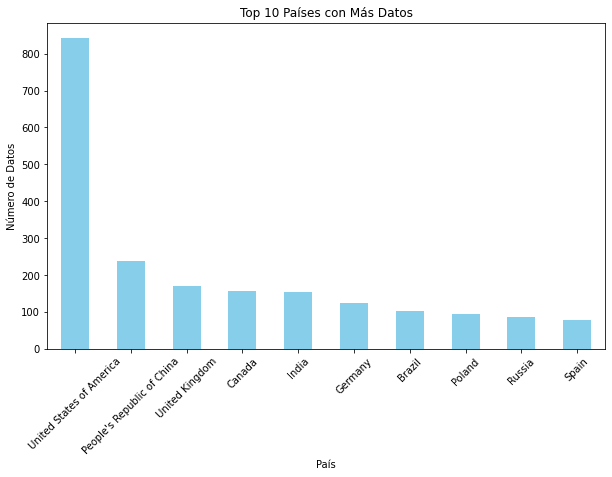

In [6]:

# Contar el número de datos por país
datos_por_pais = df['Country'].value_counts()

# Seleccionar los 10 países con más datos
top_10_paises = datos_por_pais.head(10)

# Visualizar los datos
plt.figure(figsize=(10, 6))
top_10_paises.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países con Más Datos')
plt.xlabel('País')
plt.ylabel('Número de Datos')
plt.xticks(rotation=45)
plt.show()


**Calidad del Aire en Ciudades de Argentina**

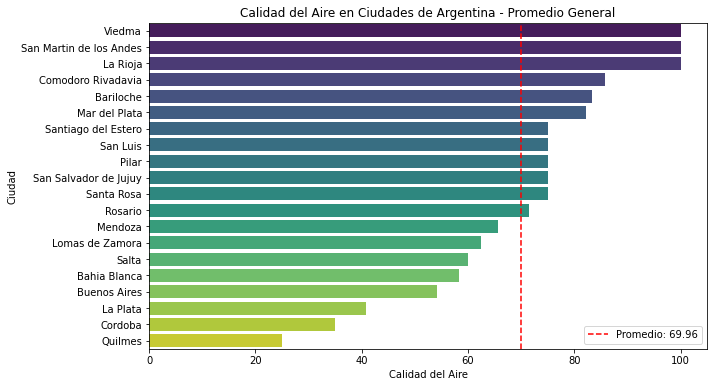

In [8]:

# Filtrar datos solo para Argentina
datos_argentina = df[df['Country'] == 'Argentina']

# Eliminar "Avellaneda" y "San Isidro" del DataFrame
datos_argentina = datos_argentina[~datos_argentina['City'].isin(['Avellaneda', 'San Isidro'])]

# Ordenar los datos por calidad del aire de mayor a menor
datos_argentina = datos_argentina.sort_values(by='AirQuality', ascending=False)

# Calcular el promedio de la calidad del aire
promedio_calidad_aire = datos_argentina['AirQuality'].mean()

# Visualizar los datos para Argentina con la línea del promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='AirQuality', y='City', data=datos_argentina, palette='viridis')
plt.axvline(x=promedio_calidad_aire, color='red', linestyle='--', label=f'Promedio: {promedio_calidad_aire:.2f}')
plt.title('Calidad del Aire en Ciudades de Argentina - Promedio General')
plt.xlabel('Calidad del Aire')
plt.ylabel('Ciudad')
plt.legend()
plt.show()


**Calidad del Aire en Ciudades de Argentina**

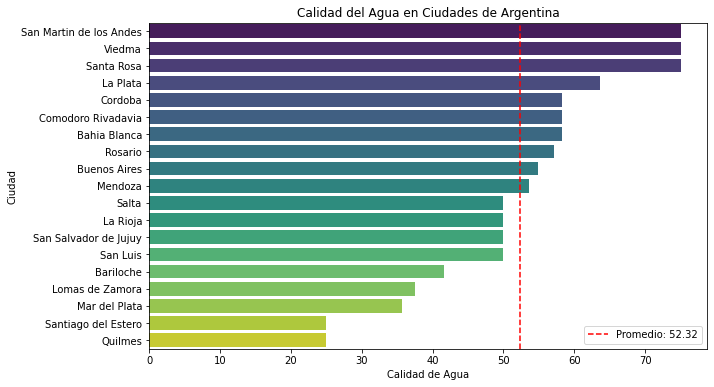

In [27]:

# Filtrar datos solo para Argentina
datos_argentina = df[df['Country'] == 'Argentina']

# Eliminar "Avellaneda", "Pilar" y "San Isidro" del DataFrame
datos_argentina = datos_argentina[~datos_argentina['City'].isin(['Avellaneda', 'Pilar', 'San Isidro'])]

# Ordenar los datos por calidad del agua de mayor a menor
datos_argentina = datos_argentina.sort_values(by='WaterPollution', ascending=False)

# Calcular el promedio de la calidad del agua en Argentina
promedio_argentina = datos_argentina['WaterPollution'].mean()

# Visualizar los datos para Argentina con una línea para el promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='WaterPollution', y='City', data=datos_argentina, palette='viridis')
plt.axvline(x=promedio_argentina, color='red', linestyle='--', label=f'Promedio: {promedio_argentina:.2f}')
plt.title('Calidad del Agua en Ciudades de Argentina')
plt.xlabel('Calidad de Agua')
plt.ylabel('Ciudad')
plt.legend()
plt.show()



**Calidad del Aire en Ciudades de España**

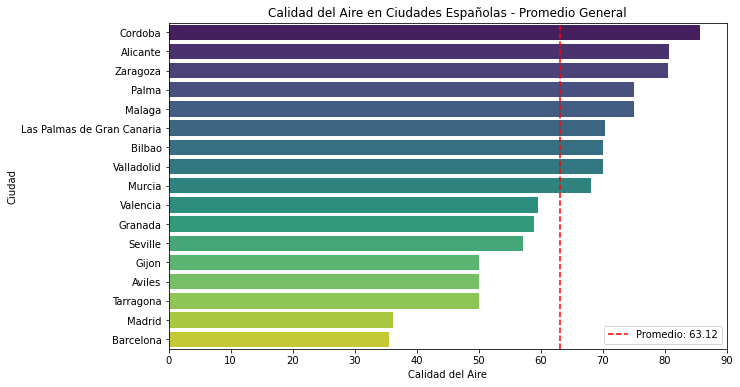

In [10]:
# Filtrar datos solo para España
datos_espana = df[df['Country'] == 'Spain']

# Obtener las ciudades más grandes
ciudades_mas_grandes = ['Madrid', 'Barcelona', 'Valencia', 'Seville', 'Zaragoza', 'Malaga', 'Murcia', 'Palma',
                         'Las Palmas de Gran Canaria', 'Bilbao', 'Alicante', 'Cordoba', 'Valladolid', 'Granada',
                         'Seville', 'Gijon', 'Aviles', 'Tarragona']

# Filtrar datos solo para las ciudades más grandes
datos_espana = datos_espana[datos_espana['City'].isin(ciudades_mas_grandes)]

# Ordenar los datos por calidad del aire de mayor a menor
datos_espana = datos_espana.sort_values(by='AirQuality', ascending=False)

# Calcular el promedio de la calidad del aire
promedio_calidad_aire_espana = datos_espana['AirQuality'].mean()

# Visualizar los datos para las ciudades más grandes de España con la línea del promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='AirQuality', y='City', data=datos_espana, palette='viridis')
plt.axvline(x=promedio_calidad_aire_espana, color='red', linestyle='--', label=f'Promedio: {promedio_calidad_aire_espana:.2f}')
plt.title('Calidad del Aire en Ciudades Españolas - Promedio General')
plt.xlabel('Calidad del Aire')
plt.ylabel('Ciudad')
plt.legend()
plt.show()



**Calidad del Agua en Ciudades de España**

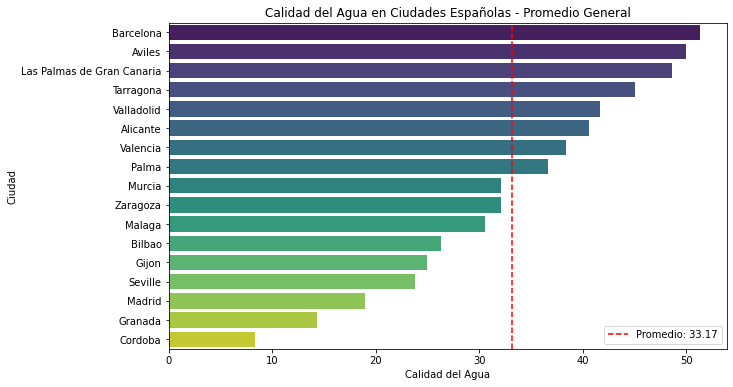

In [12]:

# Filtrar datos solo para España
datos_espana = df[df['Country'] == 'Spain']

# Obtener las ciudades más grandes
ciudades_mas_grandes = ['Madrid', 'Barcelona', 'Valencia', 'Seville', 'Zaragoza', 'Malaga', 'Murcia', 'Palma',
                         'Las Palmas de Gran Canaria', 'Bilbao', 'Alicante', 'Cordoba', 'Valladolid', 'Granada',
                         'Seville', 'Gijon', 'Aviles', 'Tarragona']

# Filtrar datos solo para las 20 ciudades más grandes
datos_espana = datos_espana[datos_espana['City'].isin(ciudades_mas_grandes)]

# Ordenar los datos por calidad del agua de mayor a menor
datos_espana = datos_espana.sort_values(by='WaterPollution', ascending=False)

# Calcular el promedio de la calidad del agua
promedio_calidad_agua_espana = datos_espana['WaterPollution'].mean()

# Visualizar los datos para las 20 ciudades más grandes de España con la línea del promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='WaterPollution', y='City', data=datos_espana, palette='viridis')
plt.axvline(x=promedio_calidad_agua_espana, color='red', linestyle='--', label=f'Promedio: {promedio_calidad_agua_espana:.2f}')
plt.title('Calidad del Agua en Ciudades Españolas - Promedio General')
plt.xlabel('Calidad del Agua')
plt.ylabel('Ciudad')
plt.legend()
plt.show()


**Calidad del Agua y del Aire en el mundo**

<bound method Axes.legend of <AxesSubplot: title={'center': '25 Mejores Países en Calidad del Aire'}, xlabel='Calidad del Aire (promedio)', ylabel='País'>>

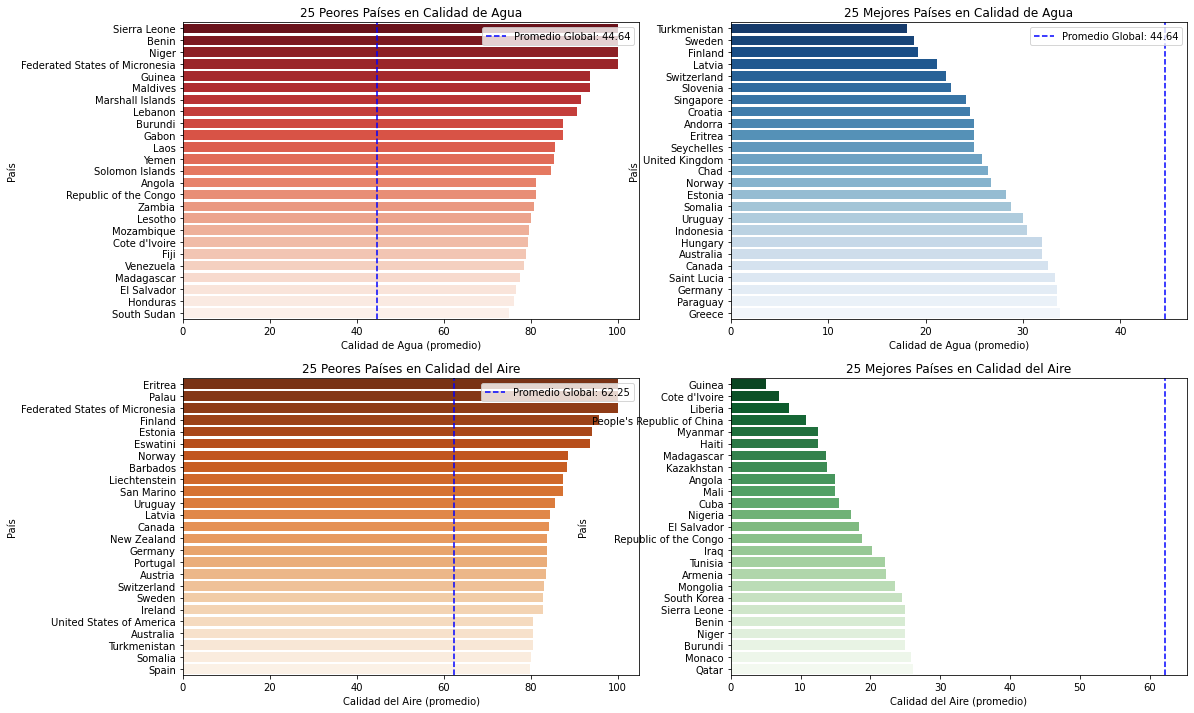

In [21]:
# Filtrar datos para los 25 peores países con calidad de agua
peores_paises_agua = df.groupby('Country')['WaterPollution'].mean().reset_index()
peores_paises_agua = peores_paises_agua[peores_paises_agua['Country'] != 'Central African Republic']
peores_paises_agua = peores_paises_agua.sort_values(by='WaterPollution', ascending=False).head(25)

# Filtrar datos para los 25 mejores países con calidad de agua
mejores_paises_agua = df.groupby('Country')['WaterPollution'].mean().reset_index()
mejores_paises_agua = mejores_paises_agua[~mejores_paises_agua['Country'].isin(['Liechtenstein', 'Palau', 'Central African Republic'])]
mejores_paises_agua = mejores_paises_agua.sort_values(by='WaterPollution').head(25)

# Filtrar datos para los 25 peores países con calidad del aire
peores_paises_aire = df.groupby('Country')['AirQuality'].mean().reset_index()
peores_paises_aire = peores_paises_aire[peores_paises_aire['Country'] != 'Central African Republic']
peores_paises_aire = peores_paises_aire.sort_values(by='AirQuality', ascending=False).head(25)

# Filtrar datos para los 25 mejores países con calidad del aire
mejores_paises_aire = df.groupby('Country')['AirQuality'].mean().reset_index()
mejores_paises_aire = mejores_paises_aire[~mejores_paises_aire['Country'].isin(['Liechtenstein', 'Palau', 'Central African Republic'])]
mejores_paises_aire = mejores_paises_aire.sort_values(by='AirQuality').head(25)

# Calcular el promedio global de la calidad del agua y del aire
promedio_global_agua = df['WaterPollution'].mean()
promedio_global_aire = df['AirQuality'].mean()

# Visualizar los datos en gráficos combinados
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Gráfico para los 25 peores países en calidad de agua
sns.barplot(ax=axes[0, 0], x='WaterPollution', y='Country', data=peores_paises_agua, palette='Reds_r')
axes[0, 0].axvline(x=promedio_global_agua, color='blue', linestyle='--', label=f'Promedio Global: {promedio_global_agua:.2f}')
axes[0, 0].set_title('25 Peores Países en Calidad de Agua')
axes[0, 0].set_xlabel('Calidad de Agua (promedio)')
axes[0, 0].set_ylabel('País')
axes[0, 0].legend()

# Gráfico para los 25 mejores países en calidad de agua
sns.barplot(ax=axes[0, 1], x='WaterPollution', y='Country', data=mejores_paises_agua, palette='Blues_r')
axes[0, 1].axvline(x=promedio_global_agua, color='blue', linestyle='--', label=f'Promedio Global: {promedio_global_agua:.2f}')
axes[0, 1].set_title('25 Mejores Países en Calidad de Agua')
axes[0, 1].set_xlabel('Calidad de Agua (promedio)')
axes[0, 1].set_ylabel('País')
axes[0, 1].legend()

# Gráfico para los 25 peores países en calidad del aire
sns.barplot(ax=axes[1, 0], x='AirQuality', y='Country', data=peores_paises_aire, palette='Oranges_r')
axes[1, 0].axvline(x=promedio_global_aire, color='blue', linestyle='--', label=f'Promedio Global: {promedio_global_aire:.2f}')
axes[1, 0].set_title('25 Peores Países en Calidad del Aire')
axes[1, 0].set_xlabel('Calidad del Aire (promedio)')
axes[1, 0].set_ylabel('País')
axes[1, 0].legend()

# Gráfico para los 25 mejores países en calidad del aire
sns.barplot(ax=axes[1, 1], x='AirQuality', y='Country', data=mejores_paises_aire, palette='Greens_r')
axes[1, 1].axvline(x=promedio_global_aire, color='blue', linestyle='--', label=f'Promedio Global: {promedio_global_aire:.2f}')
axes[1, 1].set_title('25 Mejores Países en Calidad del Aire')
axes[1, 1].set_xlabel('Calidad del Aire (promedio)')
axes[1, 1].set_ylabel('País')
axes[1, 1].legend




# Gráficos

**Mapas de Calor para el Aire y el Agua en Ciudades de Todo el Mundo**

In [16]:

# Crear mapa de calor para la calidad del aire en todo el mundo
fig_heatmap_air_quality_global = px.scatter_mapbox(
    df_combined,
    lat='latitude',
    lon='longitude',
    color='AirQuality',
    size='AirQuality',
    hover_name='City',
    mapbox_style='open-street-map',
    zoom=2,
    title='Mapa de Calor de Calidad del Aire en Todo el Mundo'
)

# Crear mapa de calor para la calidad del agua en todo el mundo
fig_heatmap_water_pollution_global = px.scatter_mapbox(
    df_combined,
    lat='latitude',
    lon='longitude',
    color='WaterPollution',
    size='WaterPollution',
    hover_name='City',
    mapbox_style='open-street-map',
    zoom=2,
    title='Mapa de Calor de Calidad del Agua en Todo el Mundo'
)

# Mostrar los mapas de calor
fig_heatmap_air_quality_global.show()
fig_heatmap_water_pollution_global.show()




In [18]:
# Crear mapa de calor para la calidad del aire en todo el mundo con escala de color 'Cividis' y zoom centrado en España
fig_heatmap_air_quality_world = px.density_mapbox(
    df_combined,
    lat='latitude',
    lon='longitude',
    z='AirQuality',
    hover_name='City',
    mapbox_style='open-street-map',
    center={'lat': 40.4168, 'lon': -3.7038},  # Coordenadas centradas en España
    zoom=5,  # Ajusta el zoom según sea necesario
    color_continuous_scale='Cividis',
    title='Mapa de Calor de Calidad del Aire en el Mundo'
)

# Crear mapa de calor para la calidad del agua en todo el mundo con escala de color 'Inferno' y zoom centrado en España
fig_heatmap_water_pollution_world = px.density_mapbox(
    df_combined,
    lat='latitude',
    lon='longitude',
    z='WaterPollution',
    hover_name='City',
    mapbox_style='open-street-map',
    center={'lat': 40.4168, 'lon': -3.7038},  # Coordenadas centradas en España
    zoom=5,  # Ajusta el zoom según sea necesario
    color_continuous_scale='Inferno',
    title='Mapa de Calor de Calidad del Agua en el Mundo'
)

# Mostrar los mapas de calor
fig_heatmap_air_quality_world.show()
fig_heatmap_water_pollution_world.show()


